In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('C:\\Users\\HARJIT\\OneDrive\\Desktop\\final.csv') 
print(data)

              Startdate           Enddate    NH3     CO   Temp     RH
0      01-01-2012 12:00  01-01-2012 13:00   5.22  16.06  31.58  80.90
1      01-01-2012 13:00  01-01-2012 14:00   5.30  18.35  31.74  79.56
2      01-01-2012 14:00  01-01-2012 15:00   5.11  18.71  31.99  81.53
3      01-01-2012 15:00  01-01-2012 16:00   5.12  18.78  32.33  80.33
4      01-01-2012 16:00  01-01-2012 17:00    NaN    NaN    NaN    NaN
...                 ...               ...    ...    ...    ...    ...
98575  31-03-2023 19:00  31-03-2023 20:00  50.93   1.46    NaN  96.79
98576  31-03-2023 20:00  31-03-2023 21:00  49.48   0.46    NaN  98.50
98577  31-03-2023 21:00  31-03-2023 22:00  49.51   0.64    NaN  98.51
98578  31-03-2023 22:00  31-03-2023 23:00  40.77   0.64    NaN  98.53
98579  31-03-2023 23:00  01-04-2023 00:00  42.16   0.50    NaN  98.55

[98580 rows x 6 columns]


In [3]:
data['NH3'] = data['NH3'].ffill()
data['NH3'] = data['NH3'].bfill()


data['CO'] = data['CO'].ffill()
data['CO'] = data['CO'].bfill()

data['Temp'] = data['Temp'].ffill()
data['Temp'] = data['Temp'].bfill()

data['RH'] = data['RH'].ffill()
data['RH'] = data['RH'].bfill()

In [4]:
print(data)

              Startdate           Enddate    NH3     CO   Temp     RH
0      01-01-2012 12:00  01-01-2012 13:00   5.22  16.06  31.58  80.90
1      01-01-2012 13:00  01-01-2012 14:00   5.30  18.35  31.74  79.56
2      01-01-2012 14:00  01-01-2012 15:00   5.11  18.71  31.99  81.53
3      01-01-2012 15:00  01-01-2012 16:00   5.12  18.78  32.33  80.33
4      01-01-2012 16:00  01-01-2012 17:00   5.12  18.78  32.33  80.33
...                 ...               ...    ...    ...    ...    ...
98575  31-03-2023 19:00  31-03-2023 20:00  50.93   1.46  38.74  96.79
98576  31-03-2023 20:00  31-03-2023 21:00  49.48   0.46  38.74  98.50
98577  31-03-2023 21:00  31-03-2023 22:00  49.51   0.64  38.74  98.51
98578  31-03-2023 22:00  31-03-2023 23:00  40.77   0.64  38.74  98.53
98579  31-03-2023 23:00  01-04-2023 00:00  42.16   0.50  38.74  98.55

[98580 rows x 6 columns]


In [5]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

data["ci"] = data["CO"].astype(float).apply(lambda x: get_CO_subindex(x))

def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

data["ni"] = data["NH3"].astype(float).apply(lambda x: get_NH3_subindex(x))



In [6]:
def calculate_aqi(ni,ci):
    aqi=0
  
    if(ni>ci):
     aqi=ni
    if(ci>ni):
      aqi=ci
  
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['ni'],x['ci']),axis=1)
data.head()

,Startdate,Enddate,NH3,CO,Temp,RH,ci,ni,AQI
0,01-01-2012 12:00,01-01-2012 13:00,5.22,16.06,31.58,80.90,286.571429,1.3050,286.571429
1,01-01-2012 13:00,01-01-2012 14:00,5.30,18.35,31.74,79.56,307.941176,1.3250,307.941176
2,01-01-2012 14:00,01-01-2012 15:00,5.11,18.71,31.99,81.53,310.058824,1.2775,310.058824
3,01-01-2012 15:00,01-01-2012 16:00,5.12,18.78,32.33,80.33,310.470588,1.2800,310.470588
4,01-01-2012 16:00,01-01-2012 17:00,5.12,18.78,32.33,80.33,310.470588,1.2800,310.470588


In [7]:
data.isnull().sum()

Startdate    0
Enddate      0
NH3          0
CO           0
Temp         0
RH           0
ci           0
ni           0
AQI          0
dtype: int64

In [8]:
X = data[['Temp', 'ci', 'ni']]
y = data['AQI']

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.1s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.1s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.1s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.1s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.1s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.1s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.1s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-06, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.2s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.1s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.2s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.1s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-05, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.2s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-06, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.2s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-05, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__la

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lamb

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__l

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambd

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-06, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.1s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.1s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-05, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-06, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lam

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-05, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_m

[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=100, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=200, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s


C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
[CV] END regressor__alpha_1=1e-07, regressor__alpha_2=1e-07, regressor__lambda_1=1e-07, regressor__lambda_2=1e-07, regressor__n_iter=300, regressor__tol=0.0001; total time=   0.0s
Best parameters: {'regressor__alpha_1': 1e-06, 'regressor__alpha_2': 1e-06, 'regressor__lambda_1': 1e-07, 'regressor__lambda_2': 1e-05, 'regressor__n_iter': 100, 'regressor__tol': 0.001}
Mean Squared Error (MSE) on test set: 19.181095069798133
Root Mean Squared Error (RMSE) on te

C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
C:\Users\HARJIT\anaconda3\Lib\site-packages\sklearn\linear_model\_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


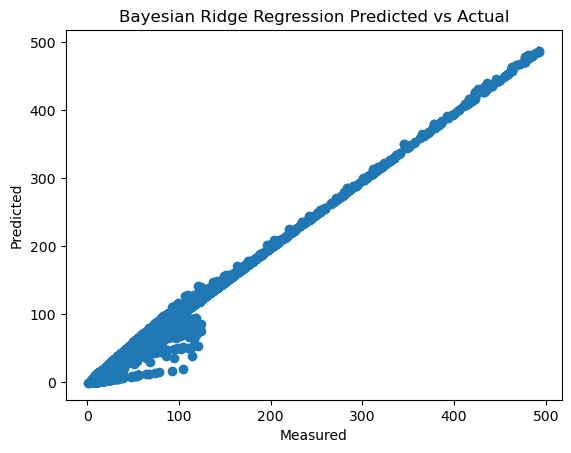

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', BayesianRidge())
])


param_grid = {
    'regressor__n_iter': [100, 200, 300],  
    'regressor__tol': [1e-3, 1e-4],  
    'regressor__alpha_1': [1e-6, 1e-5, 1e-7],  
    'regressor__alpha_2': [1e-6, 1e-5, 1e-7],
    'regressor__lambda_1': [1e-6, 1e-5, 1e-7],  # Hyperparameters of the gamma distribution prior over the lambda parameter
    'regressor__lambda_2': [1e-6, 1e-5, 1e-7],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2, return_train_score=True)
grid.fit(X_train, y_train)

# Print best parameters found by GridSearch
print(f"Best parameters: {grid.best_params_}")

# Predict on the test set using the best model found
y_pred = grid.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")
print(f"R-squared (R2) on test set: {r2}")

# Plotting
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Bayesian Ridge Regression Predicted vs Actual')
plt.show()


In [12]:
from sklearn.linear_model import BayesianRidge

def predict_aqi(temp, ci, ni, grid_search_result):
  
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({'Temp': [temp], 'ci': [ci], 'ni': [ni]})
    
    # Use the model to predict the AQI
    predicted_aqi = grid_search_result.predict(input_data)
    
    return predicted_aqi[0]

# Inputs from the user
temp = float(input("Enter the temp: "))
ci = float(input("Enter the CO subindex (ci): "))
ni = float(input("Enter the NH3 subindex (ni): "))

# Predict the AQI using the best estimator from the grid search
predicted_aqi = predict_aqi(temp, ci, ni, grid)
print(f"The predicted AQI for Temp: {temp}, CO subindex: {ci}, NH3 subindex: {ni} ,AQI is: {predicted_aqi}")



Enter the temp: 30
Enter the CO subindex (ci): 200
Enter the NH3 subindex (ni): 302
The predicted AQI for Temp: 30.0, CO subindex: 200.0, NH3 subindex: 302.0 ,AQI is: 258.0194300222346
